

# Workshop de Python

Cargamos dataset con información de clientes de una compañía de telecomunicaciones. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.



## Información sobre los datos

* **customerID** ID cliente
* **gender** Indica si el cliente es hombre o mujer
* **SeniorCitizen** Indica si el cliente está jubilado o no (1, 0)
* **Partner** Indica si el cliente tiene pareja o no (Yes, No)
* **Dependents** Indica si el cliente tiene familiares a su cargo o no (Yes, No)
* **tenure** Número de meses que el cliente lleva en la compañía de telecomunicaciones
* **PhoneService** Indica si el cliente tiene contratada línea de teléfono o no (Yes, No)
* **MultipleLines** Indica si el cliente tiene contratadas múltiples líneas o no (Yes, No, No phone service)
* **InternetService** Indica el tipo de servicio de internet del cliente (DSL, Fiber optic, No)
* **OnlineSecurity** Indica si el cliente tiene contratado servicio de seguridad online o no (Yes, No, No internet service)
* **OnlineBackup** Indica si el cliente tiene contratado servicio de copia de seguridad online o no (Yes, No, No internet service)
* **DeviceProtection** Indica si el cliente tiene contratado servicio de protección de dispositivos o no (Yes, No, No internet service)
* **TechSupport** Indica si el cliente tiene contratado servicio de soporte técnico o no (Yes, No, No internet service)
* **StreamingTV** Indica si el cliente tiene contratado servicio de TV streaming o no (Yes, No, No internet service)
* **StreamingMovies** Indica si el cliente tiene contratado servicio de streaming de películas o no (Yes, No, No internet service)
* **Contract** Tipo de contrato del cliente (Month-to-month, One year, Two year)
* **PaperlessBilling** Indica si el cliente ha solicitado factura electrónica o en papel (Yes, No)
* **PaymentMethod** El tipo de método de pago del cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges** El importe cobrado mensualmente al cliente
* **TotalCharges** La suma total de importes cobrados al cliente
* **Churn** Indica si el cliente se ha ido de la compañía de telecomunicaciones o no (Yes or No)



## Cargar librerías

Importamos las librerías necesarias:

In [2]:

import pandas as pd
import numpy as np
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)




## Lectura de datos

Generamos un data frame a partir del csv:

In [5]:
df = pd.read_csv('telco_churn.csv')



### Comprobar lectura correcta del dataset

Lo hacemos a través del método head, leyendo y mostrando los cinco primeros registros del dataset:

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




### Comprobar dimensiones del dataset

Lo hacemos a través del método info, leyendo y mostrando el número registros y tamaño del dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj



### Estudiar balanceo del dataset (sobre la variable target (Churn)

Lo hacemos a través del método value_counts, sacando el recuento de casos de cada uno de los posibles valores de la variable target (Churn):

In [8]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64



## Data Wrangling



### Formateo de las variables (strings, numéricas y booleanas)

Se crea un diccionario de formatos en el orden de los campos del dataset

In [9]:
#Se crea un diccionario de formatos en el orden de los campos del dataset
Formatos= ['str', 'str', 'int', 'str', 'str',
       'int', 'str', 'str', 'str',
       'str', 'str', 'str', 'str',
       'str', 'str', 'str', 'str',
       'str', 'float64', 'float64', 'str']
dict_formatos = dict(zip(df.columns,Formatos))

La variable TotalCharges tiene algunos registros con espacios que impiden su formateo a float. Para poder formatear, eliminamos espacios en el campo TotalCharges, sustituyendo en un primer paso por NaN:

In [10]:
#La variable TotalCharges tiene algunos registros con espacios que impiden su formateo a float. Para poder formatear, 
#eliminamos espacios en el campo TotalCharges, sustituyendo en un primer paso por NaN:
df['TotalCharges']= df.TotalCharges.replace(" ",np.nan)

Corregidos los espacios en TotalCharges, ya podemos formatear:

In [11]:
#Corregidos los espacios en TotalCharges, ya podemos formatear:
df=df.astype(dict_formatos)

Para maximizar la información útil, aproximamos los registros NaN de la variable TotalCharges con el producto de MonthlyCharges*tenure.

In [12]:
#Para maximizar la información útil, aproximamos los registros NaN de la variable TotalCharges con el producto de MonthlyCharges*tenure.
df['TotalCharges']= df.TotalCharges.replace(np.nan,df['MonthlyCharges']*df['tenure'])

Comprobamos los formatos son correctos

In [13]:
#Comprobamos los formatos son correctos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob



### Comprobación y eliminación de registros repetidos

Lo comprobamos primero únicamente en el campo CustomerID

In [14]:
#Lo comprobamos primero únicamente en el campo CustomerID
duplicados=df.duplicated ('customerID')
duplicados.value_counts()

False    7043
dtype: int64

No hay duplicados, pero dejamos un paso para eliminarlos si los hubiera en otras ocasiones

In [15]:
#Lo comprobamos primero únicamente en el campo CustomerID
df=df.drop_duplicates()



### Comprobación de columnas que no aportan información



#### Estudio de la varianza para las variables numéricas

Se trata de filtrar variables con varianza inferior a 0.02. Primero se seleccionan las numéricas:

In [123]:
#Se trata de filtrar variables con varianza inferior a 0.02. Primero se seleccionan las numéricas:
df_numerical = df.select_dtypes(include = ['int','float'])
df_numerical.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


Comprobamos que no se filtra ninguna varianza inferior a 0.02

In [124]:
#Comprobamos que no se filtra ninguna varianza inferior a 0.02
variance = df_numerical.var(axis=0)
threshold=0.02
varianzas = [elemento for elemento in variance if elemento>threshold]
print(varianzas)

[0.135874515790402, 603.1681081237256, 905.4109343405128, 5138357.167812723]




#### Estudio de agrupaciones para las variables categóricas

Comprobamos gráficamente la frecuencia de los posibles valores de las variables categóricas

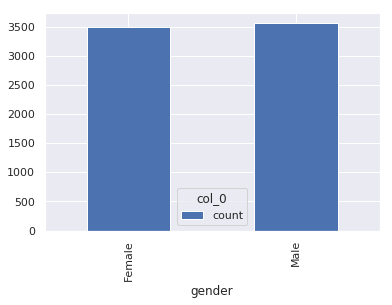

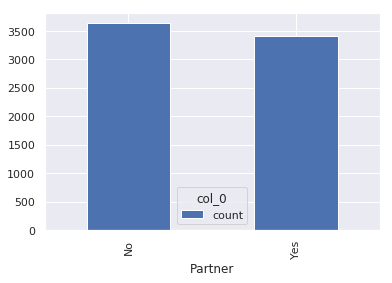

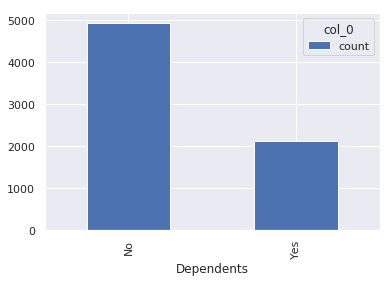

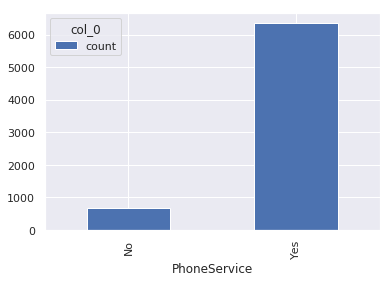

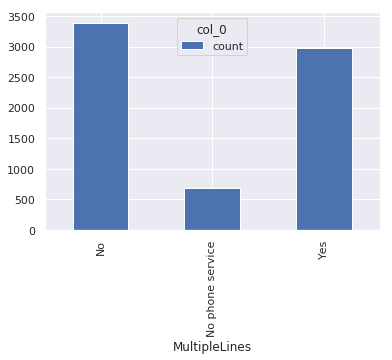

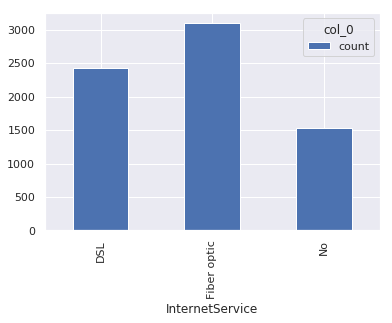

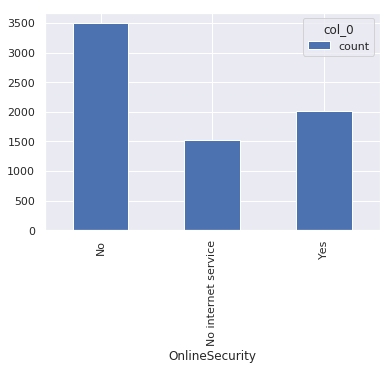

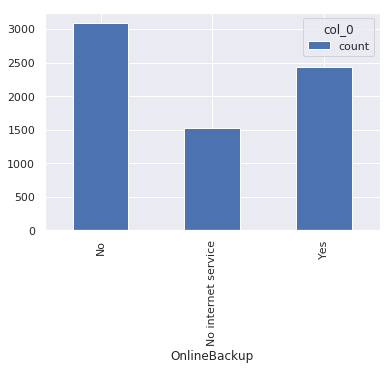

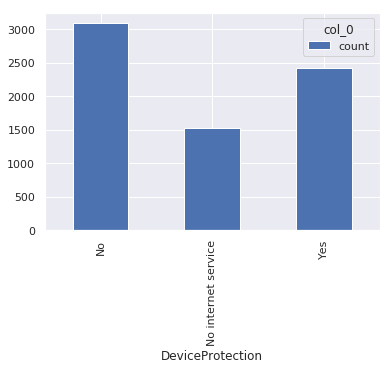

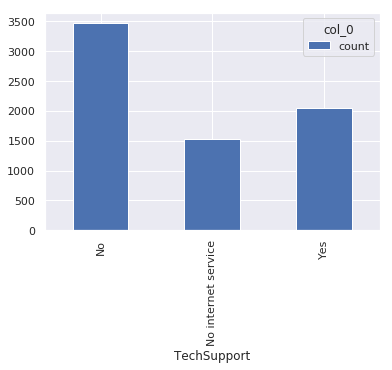

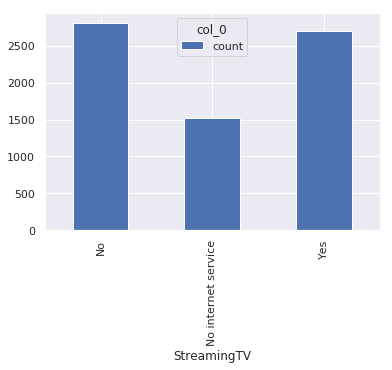

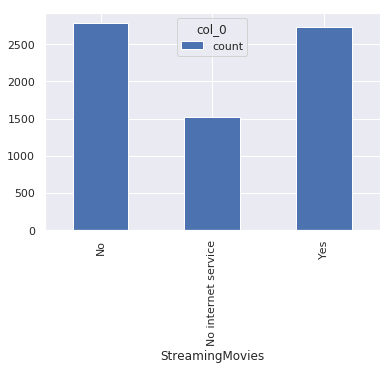

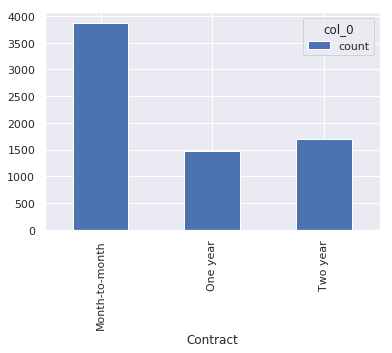

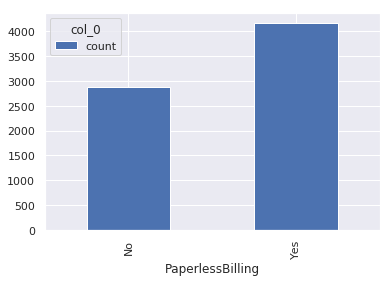

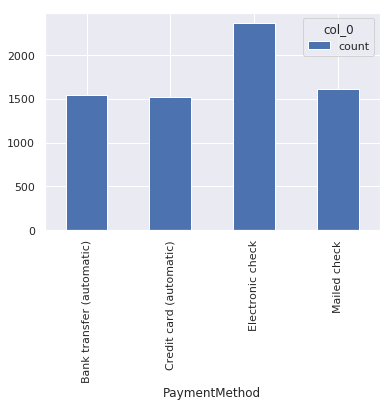

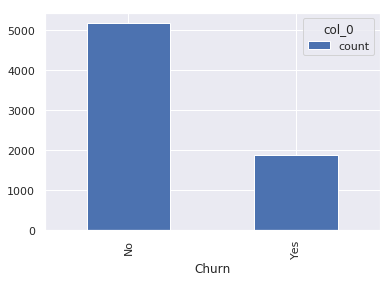

In [125]:
#Comprobamos gráficamente la frecuencia de los posibles valores de las variables categóricas
df_categorical = df.select_dtypes(include = ['O'])
for element in df_categorical.columns:
    if element!="customerID":
        my_table = pd.crosstab(index = df_categorical[element], columns="count")
        my_table.plot.bar()





### Comprobación y eliminación de nulos

Comprobación:

In [126]:
#Comprobación:
df.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [127]:
#Eliminación:
lista_clientes_nulos=[]
for i, row in df.iterrows():
    if np.isnan(row['TotalCharges']):
        lista_clientes_nulos.append(row['customerID'])
#Mostramos la lista para garantizar que está vacía
lista_clientes_nulos



[]

No eliminamos ningún cliente. En este listado se muestran los clientes que tienen la variable TotalCharges nula (es la única variable con valores nulos), y al no tratarse de Churn, los dejamos.



### Comprobación y eliminación de outliers

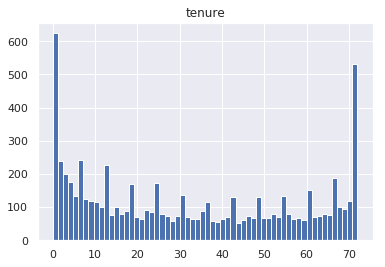

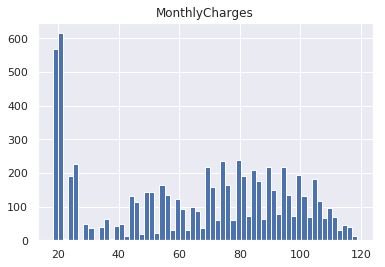

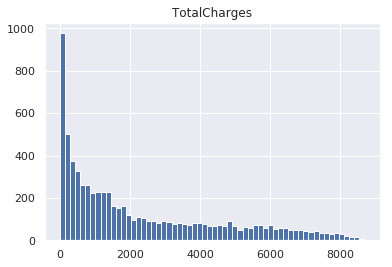

In [128]:
#Gráficamente, mostramos la distribución de frecuencias de las variables numéricas

for element in df_numerical.columns:
    if element!="SeniorCitizen":
        df.hist(element,bins=60)

Gráficamente no se observan outlaiers

In [129]:
#Analíticamente, mostramos la distribución de frecuencias de las variables numéricas
# Creamos una función que nos devuelva el número de elementos que quedan fuera del iqr
def tukey_outliers(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[25,75])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]


In [130]:
# No se encuentran outliers
df_tukey_MC = tukey_outliers(df,'MonthlyCharges',extreme=False)
df_tukey_TC = tukey_outliers(df,'TotalCharges',extreme=False)
df_tukey_T = tukey_outliers(df,'tenure',extreme=False)
print("El número de Outliers de la variable MonthlyCharges es:",df_tukey_MC.shape[0])
print("El número de Outliers de la variable TotalCharges es:",df_tukey_TC.shape[0])
print("El número de Outliers de la variable tenure es:",df_tukey_T.shape[0])


El número de Outliers de la variable MonthlyCharges es: 0
El número de Outliers de la variable TotalCharges es: 0
El número de Outliers de la variable tenure es: 0


In [131]:
#Para comprobar que ha funcionado, cambiamos los theresholds (deberían salir muchos outliers)
def tukey_outliers2(df,column,extreme=False):
    q1, q3 = np.percentile(df[column],[45,55])
    iqr = q3 - q1
    constant = 1.5 if not extreme else 3
    return df[((df[column]>(q3+constant*iqr)) | (df[column]<(q1-constant*iqr)))]

df_tukey_MC = tukey_outliers2(df,'MonthlyCharges',extreme=False)
df_tukey_TC = tukey_outliers2(df,'TotalCharges',extreme=False)
df_tukey_T = tukey_outliers2(df,'tenure',extreme=False)
print("El número de Outliers de la variable MonthlyCharges es:",df_tukey_MC.shape[0])
print("El número de Outliers de la variable TotalCharges es:",df_tukey_TC.shape[0])
print("El número de Outliers de la variable tenure es:",df_tukey_T.shape[0])

El número de Outliers de la variable MonthlyCharges es: 4362
El número de Outliers de la variable TotalCharges es: 4281
El número de Outliers de la variable tenure es: 3908


Creemos que no hay outliers a filtrar (entendiéndolos como valores extremos en colas sin continuidad clara con el resto)



### Comprobar dimensiones y balanceo del dataset (tras terminar limpieza del dataset)

In [132]:
#Comprobamos dimensiones y balanceo del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob



## Análisis Exploratorio de Datos



### Estudio de las variables categóricas

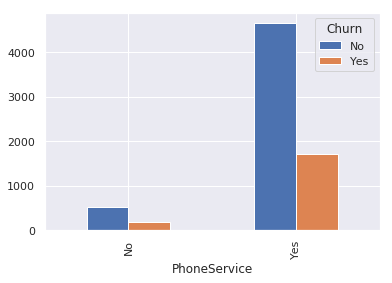

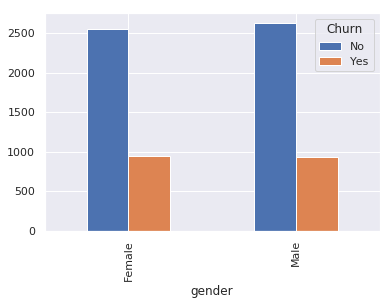

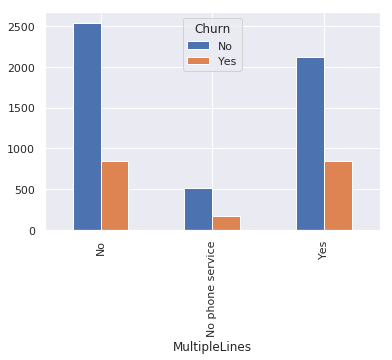

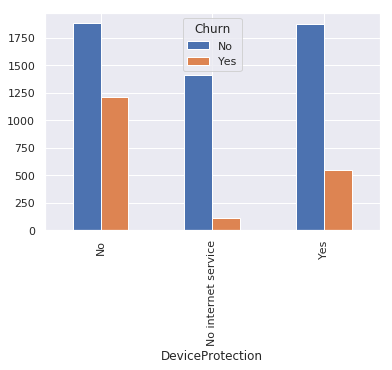

In [133]:
# Gráficamente comprobamos las distribuciones de frecuencias combinadas con la variable target

Phone_Churn = pd.crosstab(index = df_categorical['PhoneService'], columns=df_categorical['Churn'])
Phone_Churn.plot.bar()
gen_Churn = pd.crosstab(index = df_categorical['gender'], columns=df_categorical['Churn'])
gen_Churn.plot.bar()
mul_Churn = pd.crosstab(index = df_categorical['MultipleLines'], columns=df_categorical['Churn'])
mul_Churn.plot.bar()
dev_Churn = pd.crosstab(index = df_categorical['DeviceProtection'], columns=df_categorical['Churn'])
dev_Churn.plot.bar()



### Convertir variables categóricas a dummy

In [134]:
#Convertimos variables categóricas a dummy
dummy_variables = [col for col in df_categorical.columns if not col.startswith("customerID")]

df_with_dummies = pd.get_dummies(df, columns=dummy_variables)
df_with_dummies.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1




### Crear variables derivadas en caso que nos parezca interesante incluir alguna

Vamos a generar una variable de "Cargos Mensuales Históricos", definida como TotalCharges/Tenure, para ver el cargo mensual medio durante la vida del contrato.

In [135]:
#Vamos a generar una variable de "Cargos Mensuales Históricos", definida como TotalCharges/Tenure, 
#para ver el cargo mensual medio durante la vida del contrato.
df_with_dummies['MonthlyChargesHist']=df_with_dummies['TotalCharges']/df_with_dummies['tenure']
df_with_dummies.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,MonthlyChargesHist
0,7590-VHVEG,0,1,29.85,29.85,1,0,0,1,1,...,0,0,1,0,0,1,0,1,0,29.850000
1,5575-GNVDE,0,34,56.95,1889.50,0,1,1,0,1,...,0,1,0,0,0,0,1,1,0,55.573529
2,3668-QPYBK,0,2,53.85,108.15,0,1,1,0,1,...,0,0,1,0,0,0,1,0,1,54.075000
3,7795-CFOCW,0,45,42.30,1840.75,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,40.905556
4,9237-HQITU,0,2,70.70,151.65,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,75.825000




### Cálculo de la matriz de correlación

In [136]:
#Cálculo de la matriz de correlación

correlation_matrix = df_with_dummies.corr()
correlation_matrix_abs=correlation_matrix.applymap(lambda x: abs(x))



### Pintar la matriz de correlación

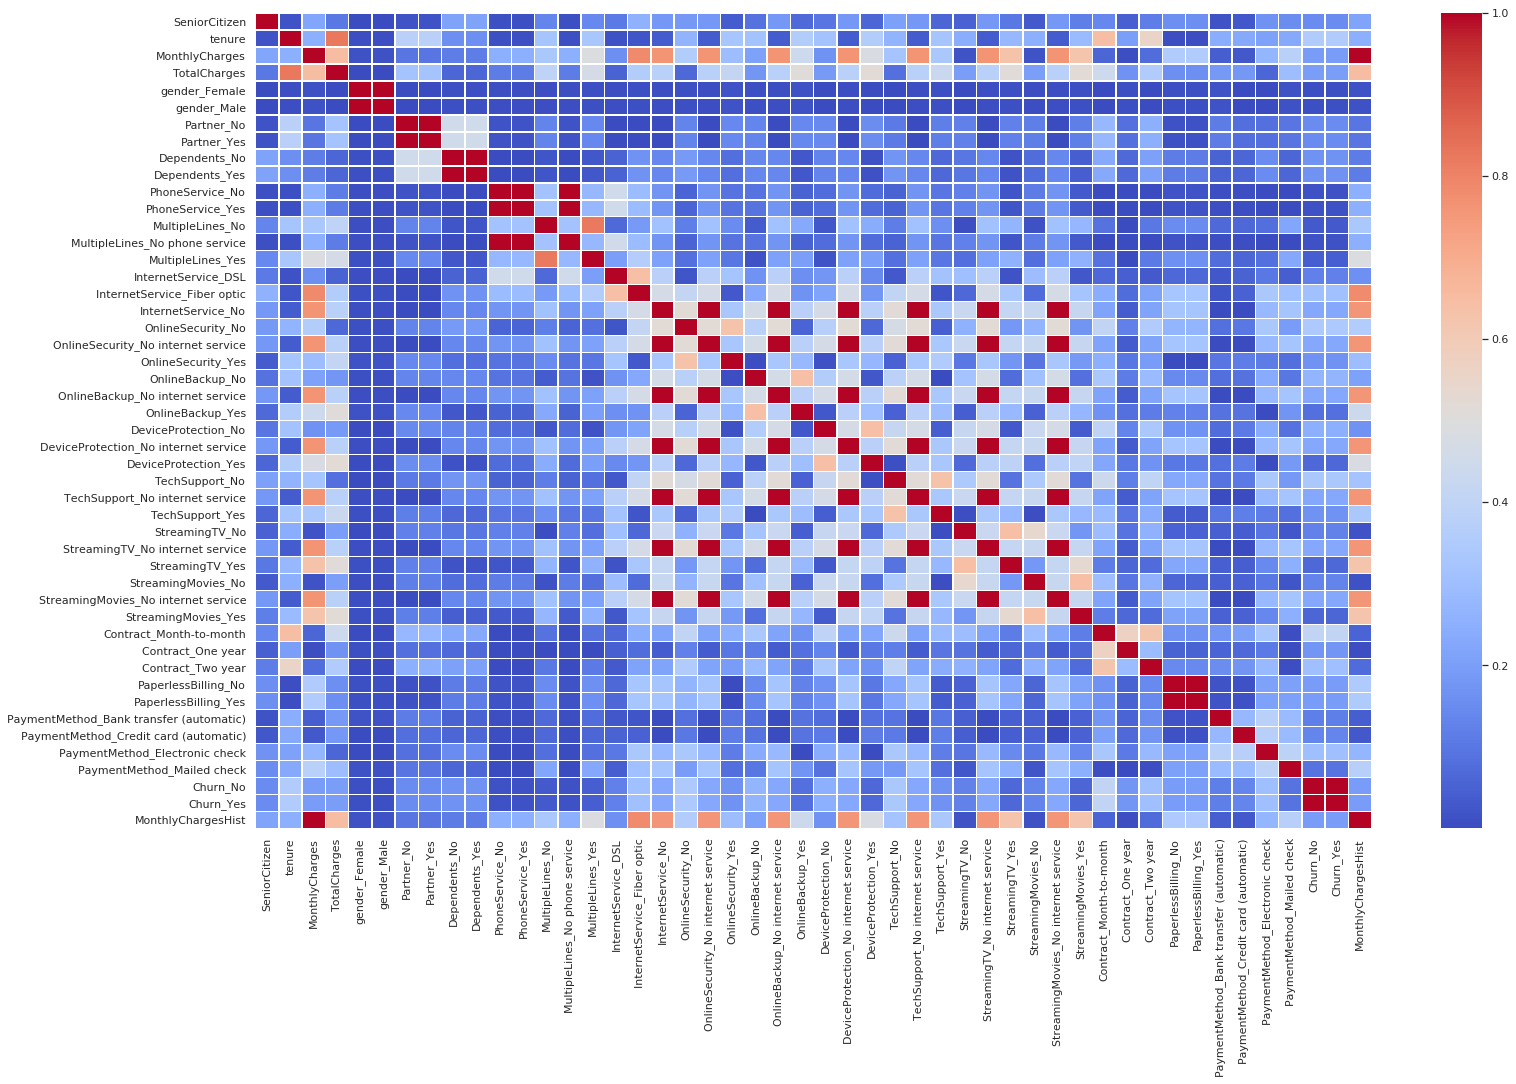

In [137]:
#Graficado de lo matriz de correlación

plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix_abs, xticklabels=list(correlation_matrix_abs), yticklabels=list(correlation_matrix_abs), fmt='.1f', linewidths = 0.5, cmap="coolwarm")



### Comprobar si hay variables correlacionadas

In [138]:
#Recorremos la matriz de correlación imprimiendo en una lista la [fila,columna,correlacion]
#Aquí nos quedamos con las correlaciones > 0.8,
#                          fila != columna
#                          correlaciones != 1
lista_corr=[]
for fila in correlation_matrix_abs:
    for columna in correlation_matrix_abs:  
        if (correlation_matrix_abs.loc[fila,columna]>0.8) and (fila!=columna) and correlation_matrix_abs.loc[fila,columna]!=1:
            lista_corr.append([fila,columna,correlation_matrix_abs.loc[fila,columna]])

#Pasamos la lista de correlaciones a DataFrame            
df_corr=pd.DataFrame(lista_corr)

#Renombramos las columnas y las ordenamos de mayor a menor correlación
df_corr.rename(columns={0:'varX',1:'varY',2:'corr'}).sort_values(by='corr',ascending=False)

,varX,varY,corr
1,MonthlyCharges,MonthlyChargesHist,0.996237
5,MonthlyChargesHist,MonthlyCharges,0.996237
0,tenure,TotalCharges,0.826178
2,TotalCharges,tenure,0.826178
3,MultipleLines_No,MultipleLines_Yes,0.822853
4,MultipleLines_Yes,MultipleLines_No,0.822853
